In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing and pre-processing data

In [27]:
iris =  pd.read_csv('Iris_Dataset.csv')
iris.replace({"Iris-setosa" :1, "Iris-versicolor" : 2, "Iris-virginica" : 3}, inplace=True)
data = iris.drop(['Id'], axis=1)
# print(data.to_string())
print(data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        1
1              4.9           3.0            1.4           0.2        1
2              4.7           3.2            1.3           0.2        1
3              4.6           3.1            1.5           0.2        1
4              5.0           3.6            1.4           0.2        1
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        3
146            6.3           2.5            5.0           1.9        3
147            6.5           3.0            5.2           2.0        3
148            6.2           3.4            5.4           2.3        3
149            5.9           3.0            5.1           1.8        3

[150 rows x 5 columns]


# 2-class classifier
Consider SepalLengthCm and SepalWidthCm as classifiers

## Sigmoid Function

In [28]:
def sigmoid_function(z):
    return .5 * (1 + np.tanh(.5 * z))

## Hypothesis Function

In [29]:
def hypothesis(X, theta):
    return np.dot(X, theta)

## Cost Function

In [30]:
def cost_function(X, Y, theta):
    infunc = -Y*(np.log(sigmoid_function(hypothesis(X, theta)))) - (1-Y)*(np.log(1-sigmoid_function(hypothesis(X, theta))))
    return np.sum(infunc)/len(Y)

## Gradient Decent Function

In [31]:
def gradient_decent_function(X, Y, alpha, iterations):
    theta = np.zeros(len(X[0]))
    m = len(Y)
    cost_values = np.zeros(iterations)
    theta0 = np.zeros(iterations)
    theta1 = np.zeros(iterations)
    theta2 = np.zeros(iterations)
    for i in range(iterations):
        z = hypothesis(X, theta)
        s = sigmoid_function(z)
        t0 = theta[0] - (alpha/m) * np.sum((s-Y))
        t1 = theta[1] - (alpha/m) * np.sum((s-Y) * X[:,1])
        t2 = theta[2] - (alpha/m) * np.sum((s-Y) * X[:,2])
        theta0[i] = t0
        theta1[i] = t1
        theta2[i] = t2
        theta =  np.array([t0 , t1, t2])
        cost_values[i] = cost_function(X, Y, theta)
    return theta, theta0, theta1, theta2, cost_values

## Making Classification for species 1 and species 2

In [32]:
data1 = data.copy(deep=False)
data1['Species'] = data1['Species'].replace([1, 2], [0, 1])
data1 = data1.set_index('Species')
data1 = data1.drop(3)
data1.reset_index(level=0, inplace=True)
# print(data1.to_string())
print(data1)

    Species  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0         0            5.1           3.5            1.4           0.2
1         0            4.9           3.0            1.4           0.2
2         0            4.7           3.2            1.3           0.2
3         0            4.6           3.1            1.5           0.2
4         0            5.0           3.6            1.4           0.2
..      ...            ...           ...            ...           ...
95        1            5.7           3.0            4.2           1.2
96        1            5.7           2.9            4.2           1.3
97        1            6.2           2.9            4.3           1.3
98        1            5.1           2.5            3.0           1.1
99        1            5.7           2.8            4.1           1.3

[100 rows x 5 columns]


Text(0.5, 0.92, 'Species 1 vs Species 2')

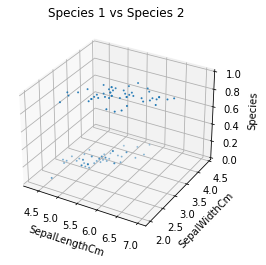

In [33]:
x1 = data1['SepalLengthCm'].values
x2 = data1['SepalWidthCm'].values
y = data1['Species'].values
ax = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y , s=1)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('Species')
ax.set_zlim(0,1)
ax.set_title("Species 1 vs Species 2")

[-3.38720409  6.05508898 -9.50452165]
0.04577411243029427


Text(0, 0.5, 's')

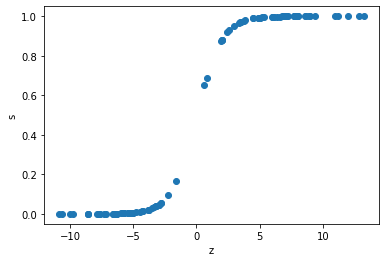

In [34]:
iterations = 10000
alpha = 0.1
X = np.column_stack((np.ones(len(x1)), x1, x2))
Y = y
theta, theta0, theta1, theta2, cost_values = gradient_decent_function(X, Y, alpha, iterations)
print(theta)
print(cost_function(X, Y, theta))
z = hypothesis(X, theta)
s = sigmoid_function(z)
plt.scatter(z, s)
plt.xlabel('z')
plt.ylabel('s')

Text(0.5, 0.92, 'Species 1 vs Species 2')

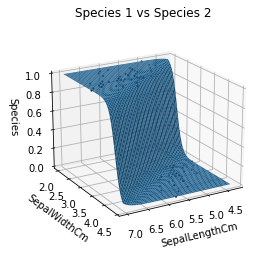

In [35]:
ax = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y , s=1, color='black')
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('Species')
samples1 = np.linspace(min(x1), max(x1))
samples2 = np.linspace(min(x2), max(x2))
samples11, samples22 = np.meshgrid(samples1,samples2)
Z = theta[0] + theta[1] * samples11 + theta[2] * samples22
Z = sigmoid_function(Z)
ax.plot_surface(samples11, samples22, Z)
ax.set_zlim(0,1)
ax.view_init(20,60)
ax.set_title("Species 1 vs Species 2")

Text(0.5, 1.0, 'Desicion Boundary')

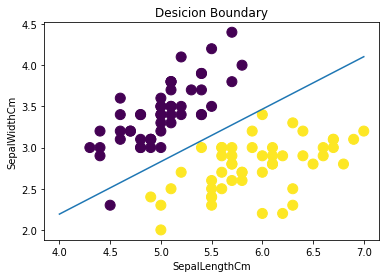

In [36]:
plt.scatter(x1, x2, s=100, c=y)
w_0 = theta[0]
w_1 = theta[1]
w_2 = theta[2]
x_points = np.linspace(4,7,100)
decision_boundary_line = -(w_1/w_2) * x_points -(w_0 / w_2)
plt.plot(x_points, decision_boundary_line)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.title("Desicion Boundary")

## Making Classification for species 2 and species 3

In [37]:
iris =  pd.read_csv('Iris_Dataset.csv')
iris.replace({"Iris-setosa" :1, "Iris-versicolor" : 2, "Iris-virginica" : 3}, inplace=True)
data = iris.drop(['Id'], axis=1)
# print(data.to_string())
data2 = data.copy(deep=False)
data2['Species'] = data2['Species'].replace([1, 2, 3], [3, 0, 1])
data2 = data2.set_index('Species')
data2 = data2.drop(3)
data2.reset_index(level=0, inplace=True)
data2

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,7.0,3.2,4.7,1.4
1,0,6.4,3.2,4.5,1.5
2,0,6.9,3.1,4.9,1.5
3,0,5.5,2.3,4.0,1.3
4,0,6.5,2.8,4.6,1.5
...,...,...,...,...,...
95,1,6.7,3.0,5.2,2.3
96,1,6.3,2.5,5.0,1.9
97,1,6.5,3.0,5.2,2.0
98,1,6.2,3.4,5.4,2.3


Text(0.5, 0.92, 'Species 2 vs Species 3')

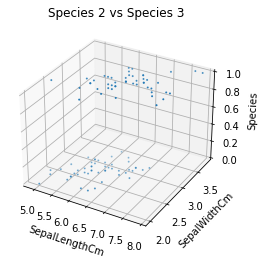

In [38]:
x1 = data2['SepalLengthCm'].values
x2 = data2['SepalWidthCm'].values
y = data2['Species'].values
ax = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y , s=1)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('Species')
ax.set_zlim(0,1)
ax.set_title("Species 2 vs Species 3")

[-9.72408005  1.53325628  0.05574344]
0.5579503148094288


Text(0, 0.5, 's')

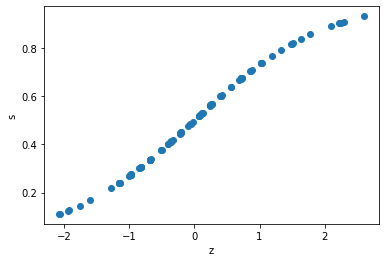

In [39]:
iterations = 10000
alpha = 0.1
X = np.column_stack((np.ones(len(x1)), x1, x2))
Y = y
theta, theta0, theta1, theta2, cost_values = gradient_decent_function(X, Y, alpha, iterations)
print(theta)
print(cost_function(X, Y, theta))
z = hypothesis(X, theta)
s = sigmoid_function(z)
plt.scatter(z, s)
plt.xlabel('z')
plt.ylabel('s')

Text(0.5, 0.92, 'Species 2 vs Species 3')

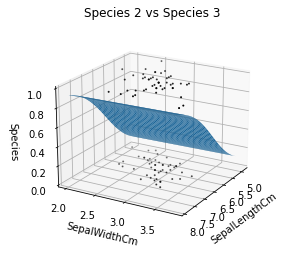

In [40]:
ax = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y , s=1, color='black')
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('Species')
samples1 = np.linspace(min(x1), max(x1))
samples2 = np.linspace(min(x2), max(x2))
samples11, samples22 = np.meshgrid(samples1,samples2)
Z = theta[0] + theta[1] * samples11 + theta[2] * samples22
Z = sigmoid_function(Z)
ax.plot_surface(samples11, samples22, Z)
ax.set_zlim(0,1)
ax.view_init(20,30)
ax.set_title("Species 2 vs Species 3")

Text(0.5, 1.0, 'Desicion Boundary')

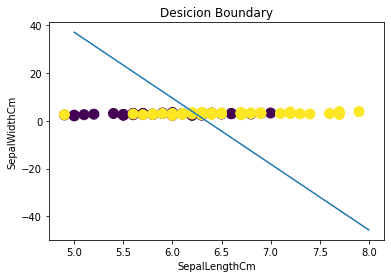

In [41]:
plt.scatter(x1, x2, s=100, c=y)
w_0 = theta[0]
w_1 = theta[1]
w_2 = theta[2]
x_points = np.linspace(5,8,100)
decision_boundary_line = -(w_1/w_2) * x_points -(w_0 / w_2)
plt.plot(x_points, decision_boundary_line)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.title("Desicion Boundary")

## Making Classification for species 3 and species 1

In [42]:
iris =  pd.read_csv('Iris_Dataset.csv')
iris.replace({"Iris-setosa" :1, "Iris-versicolor" : 2, "Iris-virginica" : 3}, inplace=True)
data = iris.drop(['Id'], axis=1)
data3 = data.copy(deep=False)
data3['Species'] = data3['Species'].replace([1, 2, 3], [1, 3, 0])
data3 = data3.set_index('Species')
data3 = data3.drop(3)
data3.reset_index(level=0, inplace=True)
data3

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,1,4.7,3.2,1.3,0.2
3,1,4.6,3.1,1.5,0.2
4,1,5.0,3.6,1.4,0.2
...,...,...,...,...,...
95,0,6.7,3.0,5.2,2.3
96,0,6.3,2.5,5.0,1.9
97,0,6.5,3.0,5.2,2.0
98,0,6.2,3.4,5.4,2.3


Text(0.5, 0.92, 'Species 3 vs Species 1')

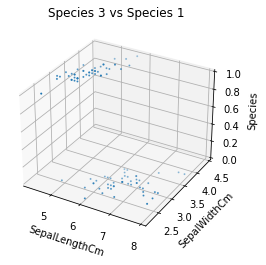

In [43]:
x1 = data3['SepalLengthCm'].values
x2 = data3['SepalWidthCm'].values
y = data3['Species'].values
ax = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y , s=1)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('Species')
ax.set_zlim(0,1)
ax.set_title("Species 3 vs Species 1")

[ 4.01709232 -5.66387211  8.86008269]
0.029450336763966765


Text(0, 0.5, 's')

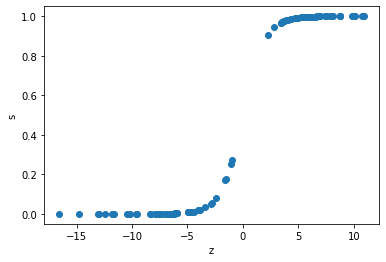

In [44]:
iterations = 10000
alpha = 0.1
X = np.column_stack((np.ones(len(x1)), x1, x2))
Y = y
theta, theta0, theta1, theta2, cost_values = gradient_decent_function(X, Y, alpha, iterations)
print(theta)
print(cost_function(X, Y, theta))
z = hypothesis(X, theta)
s = sigmoid_function(z)
plt.scatter(z, s)
plt.xlabel('z')
plt.ylabel('s')

Text(0.5, 0.92, 'Species 3 vs Species 1')

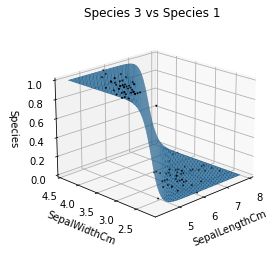

In [45]:
ax = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y , s=1, color='black')
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('Species')
samples1 = np.linspace(min(x1), max(x1))
samples2 = np.linspace(min(x2), max(x2))
samples11, samples22 = np.meshgrid(samples1,samples2)
Z = theta[0] + theta[1] * samples11 + theta[2] * samples22
Z = sigmoid_function(Z)
ax.plot_surface(samples11, samples22, Z)
ax.set_zlim(0,1)
ax.view_init(20,225)
ax.set_title("Species 3 vs Species 1")

Text(0.5, 1.0, 'Desicion Boundary')

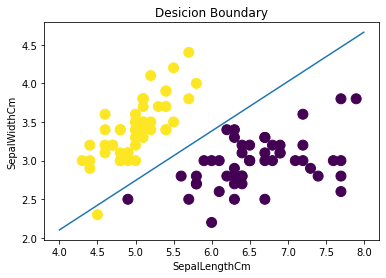

In [46]:
plt.scatter(x1, x2, s=100, c=y)
w_0 = theta[0]
w_1 = theta[1]
w_2 = theta[2]
x_points = np.linspace(4,8,100)
decision_boundary_line = -(w_1/w_2) * x_points -(w_0 / w_2)
plt.plot(x_points, decision_boundary_line)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.title("Desicion Boundary")

## Observation

### Species 1 vs Species 2
In this case we can see our decision boundary and surface are dividing our dataset species well.
### Species 2 vs Species 3
In this case we can see our decision boundary and surface are not dividing our dataset species well as compared to other two classifications.
### Species 3 vs Species 1
In this case we can see our decision boundary and surface are dividing our dataset species well.